# Clustering 

### Leer archivos 
En el archivo TablaEjemplo.txt hay una tabla mínima con datos inventados. La tabla contiene para cuatro genes (A, B, C y D) su nivel de expresión a las 0hs, 1hs y 2 hs luego de algún tratamiento.

Lo primero que vamos a hacer en R es cargar los datos de la tabla de ejemplo
__TablaEjemplo.txt.__ Para esto tipear:

In [1]:
MiTabla = read.csv("data/TablaEjemplo.txt", sep="\t", row.names="gen")
MiTabla

,X0,X1,X2
genA,2,4,8
genB,-1,-1,-2
genC,-2,0,1
genD,0,-1,-6



Lo que hicimos acá, fue leer el archivo de texto TablaEjemplo.txt utilizando la función __read.csv()__ de R (csv -- comma separated values -- es la extensión que suele usarse para nombrar archivos de texto conteniendo valores separados por algún delimitador, que comunmente es una coma, o un caracter de tabulación). Además del nombre del archivo, la función __read.csv__ nos permite declarar cual es el separador de campos (en este caso son tabulaciones, que se indican como __\t__), y cual es la columna que contiene los identificadores para las filas ("gen" es el nombre de esta columna en nuestro ejemplo). Finalmente, notar que el __resultado__ de ejecutar la función __read.csv__ se está almacenando en la variable _MiTabla_.

## Clustering sin estandarizar datos
### Calcular una matriz de distancias
A continuación vamos a utilizar la función __dist__ para __calcular una matriz de distancias__ a partir de los datos de la tabla. Recordar que estos datos ya están cargados en una variable que se llama MiTabla.

In [2]:
MisDistancias = dist(MiTabla, method="euclidean")
MisDistancias

          genA      genB      genC
genB 11.575837                    
genC  9.000000  3.316625          
genD 15.000000  4.123106  7.348469

### Agrupacion de genes
Seguidamente vamos agrupar en __forma jerárquica__ a los genes, de acuerdo a esta matriz de distancias, utilizando la función __hclust()__

In [3]:
MiClusteringJerarquico = hclust(MisDistancias, method = "complete")
MiClusteringJerarquico


Call:
hclust(d = MisDistancias, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 4 


En este caso complete = __complete linkage__, single = __single linkage__ (o vecino mas cercano), average = promedio.

### Graficar el dendograma
Para graficar el __resultado de este agrupamiento__ utilizamos la función __plot()__, grafica el dendograma que resulta del clustering jerarquico.

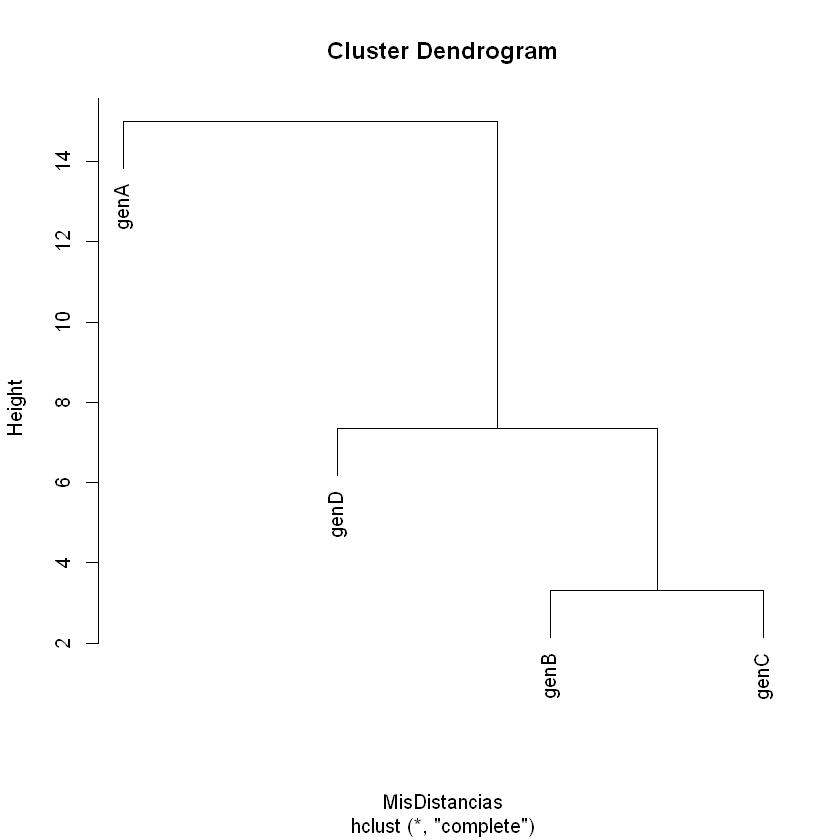

In [4]:
plot(MiClusteringJerarquico)

#### Exportando graficos
Los gráficos de R se pueden exportar a PDF y aJPEG facilmente:

In [5]:
pdf("data/Resultados/dendograma.pdf") #alternativamente >jpeg("MiImagen.jpeg")
plot(MiClusteringJerarquico) # el plot se escribe en el PDF (no se muestra en pantalla!)
dev.off() # cierra el archivo, los próximos plots volverán a ser mostrados en pantalla

ERROR: Error in pdf("data/Resultados/dendograma.pdf"): cannot open file 'data/Resultados/dendograma.pdf'


## Estandarizar datos
Ahora vamos a repetir el analisis, estandarizando los datos de expresión disponble para cada gen, de manera de que todos los valores de experesion se encuentren en la __misma escala__ y __centrados en cero__.
#### t()
Primero necesitamos transponer la matriz de datos, las columanas pasen a ser filas y vicercersa.

In [6]:
print("Tabla al inicio:")
MiTabla

[1] "Tabla al inicio:"


,X0,X1,X2
genA,2,4,8
genB,-1,-1,-2
genC,-2,0,1
genD,0,-1,-6


In [7]:
MiTablaTranspuesta = t(MiTabla)
print("Tabla transpuesta:")
MiTablaTranspuesta

[1] "Tabla transpuesta:"


,genA,genB,genC,genD
X0,2,-1,-2,0
X1,4,-1,0,-1
X2,8,-2,1,-6


#### scale()
__R__ cuenta con la función scale() para estandarizar datos. El problema es que esta funcion __estandariza por columnas__, y nosotros necesitamos hacerlo por filas.

In [8]:
#Estandarizamos los datos
MiTablaEstandarizada = scale(MiTablaTranspuesta)
MiTablaEstandarizada

,genA,genB,genC,genD
X0,-0.8728716,0.5773503,-1.0910895,0.7258662
X1,-0.2182179,0.5773503,0.2182179,0.4147807
X2,1.0910895,-1.1547005,0.8728716,-1.1406469


In [9]:
#Volver a transpone la tabla estandarizada
MiTablaEstandarizada = t(MiTablaEstandarizada)
MiTablaEstandarizada

,X0,X1,X2
genA,-0.8728716,-0.2182179,1.0910895
genB,0.5773503,0.5773503,-1.1547005
genC,-1.0910895,0.2182179,0.8728716
genD,0.7258662,0.4147807,-1.1406469


## Clustering estandarizando datos
#### Concatenacion de funciones
Todo lo anterior de __estandarizacion de datos__ se puede hacer con la __concatenacion de funciones__ en tres paso (transponer la tabla, noramlizar y volverla a tranponer):

In [10]:
MiTablaSTD = t(scale(t(MiTabla)))
MiTablaSTD

,X0,X1,X2
genA,-0.8728716,-0.2182179,1.0910895
genB,0.5773503,0.5773503,-1.1547005
genC,-1.0910895,0.2182179,0.8728716
genD,0.7258662,0.4147807,-1.1406469


Ahora vamos a repetir el proceso, pero utilizando la tabla de datos estandarizada MiTablaSTD.
- Calcular la matriz de distancias __dist__
- Realizar el clustering __hclust__
- Graficar el dendograma __plot__


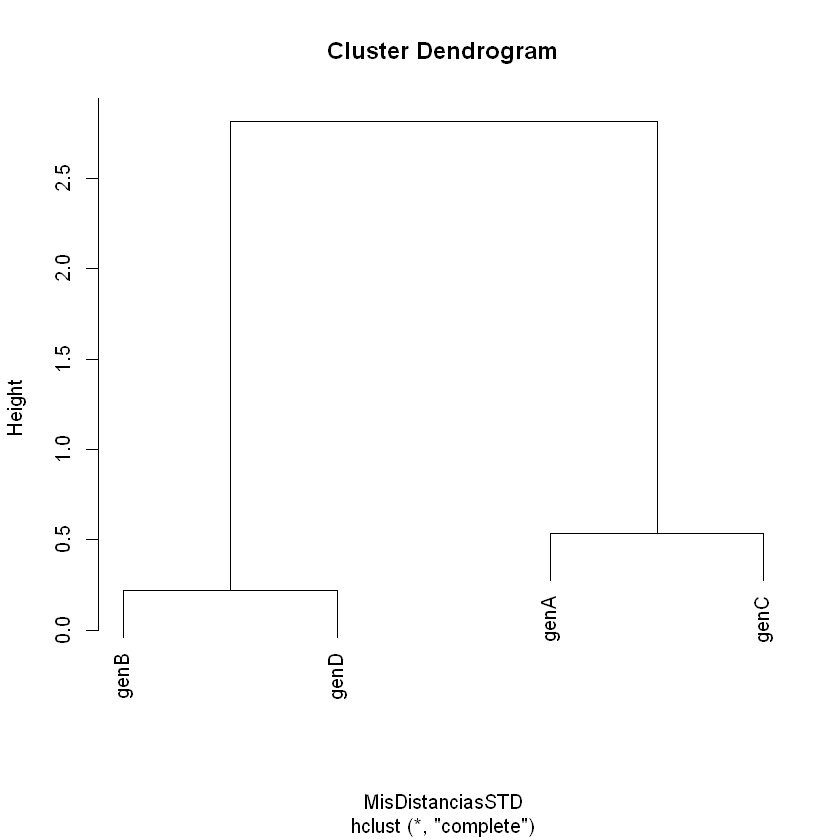

In [11]:
MisDistanciasSTD = dist(MiTablaSTD, method="euclidean")
MiClusteringJerarquicoSTD = hclust(MisDistanciasSTD, method = "complete")
plot(MiClusteringJerarquicoSTD)


## 2. Datos no estandarizados
### Correlación
Las distancias basadas en correlación permiten comparar "tendencias" en los __datos no estandarizados__, en forma similar a la discancia euclidia con datos previamente estandarizados.
### cor()
calcula la matriz de __correlaciones__ sobre las columnas. Este coeficiente de correlacion varia entre __1__(genes __perfectamente correlacionados__)  y __-1__(genes __negativa perfecta__) pasando por el __0__(__no hay correracion__ lineal entre ellos) 

- __dist(1-cor())__

Si existe __correlación alta__, la __distancia sea mínima__ y viceversa.

- __as.dist()__

Convierte la matriz a __formato correcto__ para ser utilizado por las funciones de clustering.

In [12]:
DistanciaCorr = as.dist(1-cor(t(MiTabla)))
DistanciaCorr

           genA       genB       genC
genB 1.94491118                      
genC 0.07142857 1.75592895           
genD 1.98432414 0.01217084 1.84855529

### Visualizar dendograma
Inspeccionamos el heatmap que es una imagen que __muestra niveles de expresion__ mas altos como mas calientes o blancos/amarillos y los de menos expresion como mas frios o rojos. 
- __Colv__ 

Indica si las columnas (tiempos en este caso) __deben ser agrupadas o reordenadas__ y cómo. Colv= NA(not available), indica que no las reagrupe (respetando el orden natural de la variable tiempo).
- __hclust()__ 

Las filas (genes) van a ser agrupadas utilizando la funcion __hclust()__ con sus opciones por default y la distancia euclidea, a menos que se indique otra cosa.

Observando el dendograma de los datos estandarizados y el heatmap, podemos ver que hay dos grupos bien distinguibles de genes. Uno que aumenta su expresión a lo largo del tiempo y el otro que disminuye. 

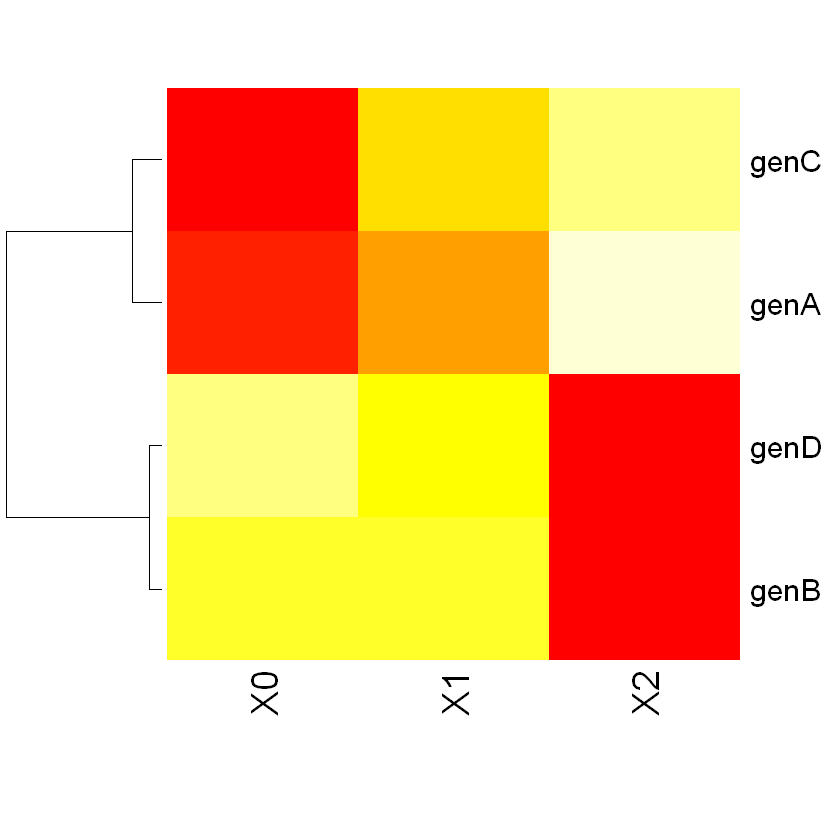

In [13]:
heatmap(MiTablaSTD, Colv = NA)

### Cortar el arbol
Podermos cortar el arbol para quedarnos con estos dos grupos a cualquier altura entre ~1 y ~2.5, con la funcion __cutree()__.

#### Cortar por altura
Cortamos el arbol a la altura de 1.5.

Visualizamos a que cluster fue asignado cada gen

In [14]:
MiCorte = cutree(MiClusteringJerarquicoSTD, h=1.5)
print("Gen cluster")
MiCorte

[1] "Gen cluster"


genA genB genC genD 
   1    2    1    2

#### Cortar por numero de clusters
Cortamos el arbol a una altura tal que el número de clusters obtemido sea de 2.

In [15]:
MiCorte = cutree(MiClusteringJerarquicoSTD, k = 2)
MiCorte

genA genB genC genD 
   1    2    1    2

## Generar sub clusters
Ahora vamos a agrupar los genes del mismo ejemplo por e metodo de __K-medias__, al que se le debe pedir apriori un número de clusters. Se utiliza la función __kmeans()__.

In [16]:
num_Clusters = 2
MiClusteringKMedias = kmeans(MiTablaSTD, num_Clusters)
MiClusteringKMedias

K-means clustering with 2 clusters of sizes 2, 2

Cluster means:
          X0            X1         X2
1  0.6516082  4.960655e-01 -1.1476737
2 -0.9819805 -5.551115e-17  0.9819805

Clustering vector:
genA genB genC genD 
   2    1    2    1 

Within cluster sum of squares by cluster:
[1] 0.02434168 0.14285714
 (between_SS / total_SS =  97.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Si el __número de clusters__ a encontrar __fuera mayor__, es recomendable aumentar el _número de inicios al azar_; por ejemplo, para inicializar 100 veces en forma aleatoria:

In [17]:
kmeans(MiTablaGrande,5,nstart = 100)

ERROR: Error in as.matrix(x): objeto 'MiTablaGrande' no encontrado
